In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
%matplotlib inline
from sklearn import linear_model, datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plt.style.use('ggplot')
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')


In [2]:
data.shape

(690, 16)

In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [6]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [7]:
categorial_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

In [8]:
print(categorial_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [9]:
data[categorial_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b523f9860>,
      dtype=object)

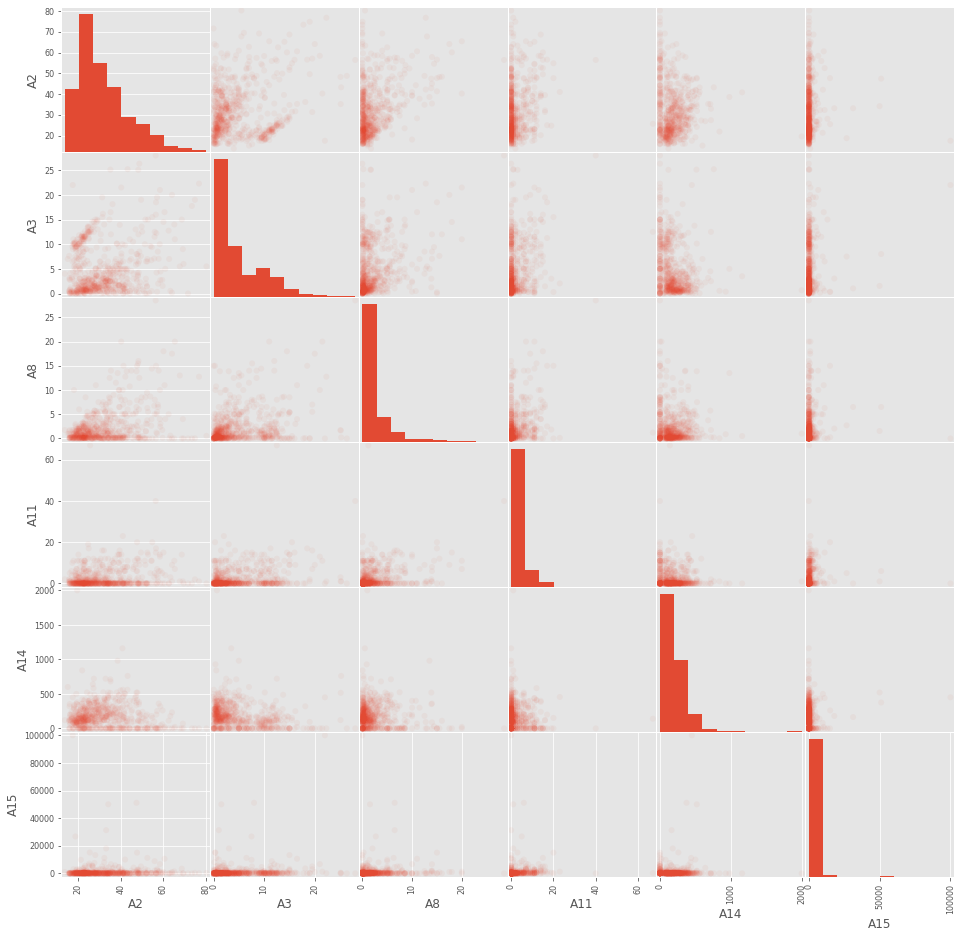

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(16, 16), alpha=0.05, marker="o")

In [11]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


In [12]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

In [13]:
data = data.fillna(data.median(axis=0), axis=0)
data.count(axis=0)

A1       678
A2       690
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      690
A15      690
class    690
dtype: int64

In [14]:
data['A1'].describe().top

'b'

In [15]:
data['A1'] = data['A1'].fillna(data['A1'].describe().top)

In [16]:
data_describe = data.describe(include=[object])
for c in categorial_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [17]:
data.describe(include=[object])


,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [18]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [19]:
binary_columns    = [c for c in categorial_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorial_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [20]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [21]:
data.at[data['A1'] == 'b', 'A1'] = 0
data.at[data['A1'] == 'a', 'A1'] = 1
data['A1'].describe()

count     690
unique      2
top         0
freq      480
Name: A1, dtype: int64

In [22]:
data_describe = data.describe(include=[object])
data_describe

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,0,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [23]:
for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [24]:
    data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383


In [25]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [26]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

In [27]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [28]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.581751e-15,2.085288e-16,1.879334e-16,2.067589e-16,4.827057e-17,-1.448117e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


In [29]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print (data.columns)
print(data)

(690, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')
           A2        A3        A8       A11  ...  A7_z  A13_g  A13_p  A13_s
0   -0.057681 -0.955920 -0.290872 -0.287892  ...   0.0    1.0    0.0    0.0
1    2.289656 -0.060007  0.244013  0.740293  ...   0.0    1.0    0.0    0.0
2   -0.591397 -0.855481 -0.216167 -0.493529  ...   0.0    1.0    0.0    0.0
3   -0.310627 -0.646569  0.456175  0.534656  ...   0.0    1.0    0.0    0.0
4   -0.956482  0.174015 -0.153415 -0.493529  ...   0.0    0.0    0.0    1.0
..        ...       ...       ...       ...  ...   ...    ...    ...    ...
685 -0.879756  1.069928 -0.290872 -0.493529  ...   0.

In [30]:
print(data.corr())
eig = np.linalg.eigvals(data.corr())
eig = np.sort(eig)
print(eig)
print((eig[41]+eig[42])/np.sum(eig))

             A2        A3        A8  ...     A13_g     A13_p     A13_s
A2     1.000000  0.202177  0.391464  ...  0.012625  0.013670 -0.018712
A3     0.202177  1.000000  0.298902  ...  0.123569 -0.037842 -0.116404
A8     0.391464  0.298902  1.000000  ...  0.031670 -0.065938 -0.007965
A11    0.187327  0.271207  0.322330  ...  0.142938 -0.053491 -0.130871
A14   -0.079844 -0.222026 -0.075703  ... -0.089370  0.004839  0.092950
A15    0.018719  0.123121  0.051345  ... -0.032303  0.238870 -0.058611
A1    -0.035044  0.041746 -0.086544  ...  0.083916 -0.012792 -0.084069
A9    -0.204434 -0.244317 -0.345689  ... -0.129207  0.113451  0.092985
A10    0.086037  0.174846  0.222982  ...  0.248609 -0.093598 -0.227403
A12    0.053599 -0.013023  0.138139  ...  0.007649 -0.072382  0.020030
class  0.164086  0.206294  0.322475  ...  0.089056  0.039245 -0.109758
A4_l  -0.062435  0.069678  0.044767  ... -0.167188  0.245988  0.081747
A4_u   0.106929  0.074649  0.069945  ... -0.017953  0.028979  0.007781
A4_y  

In [31]:
sclearn_PCA = sklearnPCA(n_components = 2)
sklearn_transf = sclearn_PCA.fit_transform(data)
X = sklearn_transf;
y = data['class']

In [32]:
print (X.shape)
print (y.shape)
N, d = X.shape

(690, 2)
(690,)


In [33]:
print(X)

[[-0.47338022  0.10635944]
 [ 1.96016431 -0.4448864 ]
 [-0.79733684  0.47151255]
 ...
 [ 0.12235299 -0.46231461]
 [-1.78192158  0.26609589]
 [ 0.76758485 -0.67458616]]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

483 207


In [35]:
from sklearn.linear_model import LogisticRegressionCV

logis = LogisticRegressionCV()
linear = LinearRegression()
res = logis.fit(X_train, y_train)
linearRes = linear.fit(X_train, y_train)

In [36]:
print(res.scores_)
print(linearRes.score(X_train, y_train))

{1.0: array([[0.54639175, 0.63917526, 0.65979381, 0.71134021, 0.70103093,
        0.70103093, 0.70103093, 0.70103093, 0.70103093, 0.70103093],
       [0.53608247, 0.62886598, 0.71134021, 0.74226804, 0.74226804,
        0.75257732, 0.75257732, 0.75257732, 0.75257732, 0.75257732],
       [0.53608247, 0.63917526, 0.81443299, 0.83505155, 0.83505155,
        0.83505155, 0.83505155, 0.83505155, 0.83505155, 0.83505155],
       [0.54166667, 0.65625   , 0.71875   , 0.78125   , 0.77083333,
        0.77083333, 0.78125   , 0.78125   , 0.78125   , 0.78125   ],
       [0.54166667, 0.61458333, 0.78125   , 0.77083333, 0.79166667,
        0.79166667, 0.79166667, 0.79166667, 0.79166667, 0.79166667]])}
0.2880363725222159


In [37]:
y_train_predict = linear.predict(X_train)
y_test_predict = linear.predict(X_test)
y_test_predict1 = linear.predict_proba(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (1-err_train, 1-err_test)

# print(y_test_predict1[:10])
print(np.concatenate((np.transpose([y_test_predict[:100]]), y_test_predict1[:100],np.transpose([np.array(y_test[:100])])),axis=1))

AttributeError: ignored

In [ ]:
X=np.array(X_train)
Y=np.array(y_train)

h = 0.02  

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logis.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
fprPCA, tprPCA, thresholds = roc_curve(y_train, logis.predict_proba(X_train)[:, 1])
roc_aucPCA = auc(fprPCA, tprPCA)

In [ ]:
plt.plot(fprPCA, tprPCA, label='Метод головних компонент (площа = %0.3f)' % roc_aucPCA)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Специфічність')
plt.ylabel('Чутливість')
plt.legend(loc="lower right")

In [ ]:
X = data.drop(('class'), axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
res = logis.fit(X_train, y_train)
y_train_predict = logis.predict(X_train)
y_test_predict = logis.predict(X_test)

y_test_predict1 = logis.predict_proba(X_test)
print(np.concatenate((np.transpose([y_test_predict[:10]]), y_test_predict1[:10],np.transpose([np.array(y_test[:10])])),axis=1))

In [ ]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (1-err_train, 1-err_test)

In [ ]:
fprAll, tprAll, thresholds = roc_curve(y_train, logis.predict_proba(X_train)[:, 1])
roc_aucAll = auc(fprAll, tprAll)

# plt.subplots(figsize = (10,5))
plt.plot(fprAll, tprAll, label='Усі критерії (площа = %0.3f)' % roc_aucAll)
plt.plot(fprPCA, tprPCA, label='Метод головних компонент (площа = %0.3f)' % roc_aucPCA)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Специфічність')
plt.ylabel('Чутливість')
plt.legend(loc="lower right")

In [ ]:
res = logis.fit(X_train, y_train)
y_train_predict = logis.predict(X_train)
y_test_predict = logis.predict(X_test)

In [ ]:
columns = np.array(X_train.columns)
finalErrTrain = 0.5
for i in range (X_train.shape[1]):
  for j in range(i+1,X_train.shape[1]):
        res = logis.fit(X_train[columns[[i,j]]], y_train)
        y_train_predict = logis.predict(X_train[columns[[i,j]]])
        err_train = np.mean(y_train != y_train_predict)
        if finalErrTrain>err_train :
          cTemp = X_train[columns[[i,j]]]
          finalI = i
          finalJ = j
          finalErrTrain = err_train

In [ ]:
usedCriterias=[]
usedCriterias = np.append(usedCriterias,columns[[finalI,finalJ]])
removedColumns = np.delete(columns,[finalI,finalJ])
print(usedCriterias)
print(removedColumns)

In [ ]:
res = logis.fit(X_train[usedCriterias], y_train)
y_test_predict = logis.predict(X_test[usedCriterias])
err_test  = np.mean(y_test  != y_test_predict)
print('Train: ', 1-finalErrTrain,'Test: ', 1-err_test)

y_test_predict1 = logis.predict_proba(X_test[usedCriterias])
print(np.concatenate((np.transpose([y_test_predict[:10]]), y_test_predict1[:10],np.transpose([np.array(y_test[:10])])),axis=1))

In [ ]:
X=np.array(X_train)
Y=np.array(y_train)

h = 0.02  

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logis.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
for j in range (40):
  b = cTemp
  updated = 0
  for i in range (removedColumns.shape[0]):
    a = np.array(X_train[removedColumns[[i]]])
    c = np.concatenate((b,a),axis = 1)
    res = logis.fit(c, y_train)
    y_train_predict = logis.predict(c)
    err_train = np.mean(y_train != y_train_predict)
    if finalErrTrain>err_train :
      finalI = i
      finalErrTrain = err_train
      cTemp = c
      updated = 1
  if updated == 0:
    break
  usedCriterias = np.append(usedCriterias,removedColumns[finalI])
  removedColumns = np.delete(removedColumns,finalI)

In [ ]:
print(usedCriterias)
print(removedColumns)

In [ ]:
res = logis.fit(X_train[usedCriterias], y_train)
y_train_predict = logis.predict(X_train[usedCriterias])
y_test_predict = logis.predict(X_test[usedCriterias])
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print('Train: ', 1-err_train,'Test: ', 1-err_test)
y_test_predict1 = logis.predict_proba(X_test[usedCriterias])

print(np.concatenate((np.transpose([y_test_predict[:10]]), y_test_predict1[:10],np.transpose([np.array(y_test[:10])])),axis=1))

In [ ]:
res = logis.fit(X_train[usedCriterias], y_train)
fprStep, tprStep, thresholds = roc_curve(y_train, logis.predict_proba(X_train[usedCriterias])[:, 1])
roc_aucStep = auc(fprStep, tprStep)

res = logis.fit(X_train[usedCriterias[[0,1]]], y_train)
fprTwoMain, tprTwoMain, thresholds = roc_curve(y_train, logis.predict_proba(X_train[usedCriterias[[0,1]]])[:, 1])
roc_aucTwoMain = auc(fprTwoMain, tprTwoMain)

plt.subplots(figsize = (8,5))
plt.plot(fprAll, tprAll, label='Усі критерії (площа = %0.3f)' % roc_aucAll)
plt.plot(fprPCA, tprPCA, label='Метод головних компонент (площа = %0.3f)' % roc_aucPCA)
plt.plot(fprTwoMain, tprTwoMain, label='Два найбільш впливові критерії (площа = %0.3f)' % roc_aucTwoMain)
plt.plot(fprStep, tprStep, label='Покрокова регресія (площа = %0.3f)' % roc_aucStep)

plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Специфічність')
plt.ylabel('Чутливість')
plt.legend(loc="lower right")